In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader

from torchvision import datasets, transforms, models
from torchvision.utils import make_grid
from torchvision import datasets, transforms, models

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import os
from PIL import Image
from IPython.display import display


# ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [8]:
path = '/Users/asadmolayari/Desktop/my_courses/pytorch/Data/CATS_DOGS/test/CAT/10107.jpg'

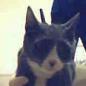

In [10]:
with Image.open(path) as m:
    display(m)

In [11]:
path = '/Users/asadmolayari/Desktop/my_courses/pytorch/Data/CATS_DOGS/'

img_names = []

for folder, subfolders, filenames in os.walk(path):
    for img in filenames:
        img_names.append(folder + '/'+img)

In [12]:
len(img_names)

24994

In [13]:
img_names [:3]

['/Users/asadmolayari/Desktop/my_courses/pytorch/Data/CATS_DOGS/test/CAT/9733.jpg',
 '/Users/asadmolayari/Desktop/my_courses/pytorch/Data/CATS_DOGS/test/CAT/10321.jpg',
 '/Users/asadmolayari/Desktop/my_courses/pytorch/Data/CATS_DOGS/test/CAT/11981.jpg']

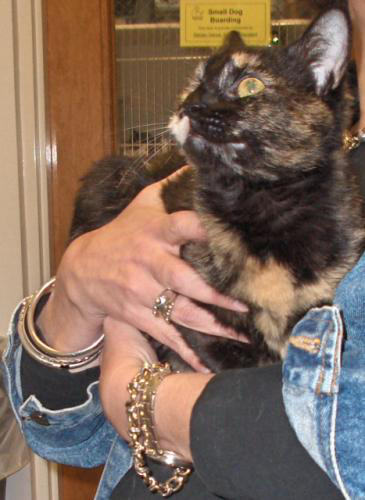

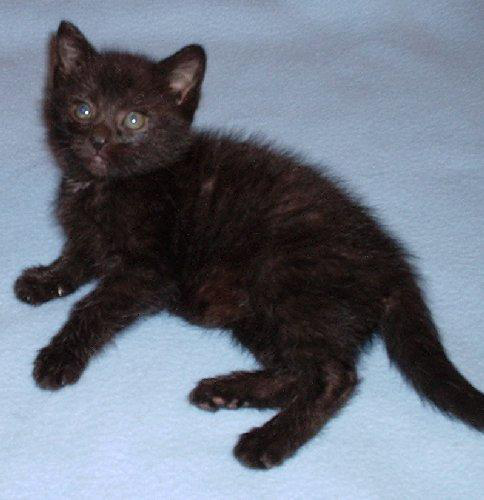

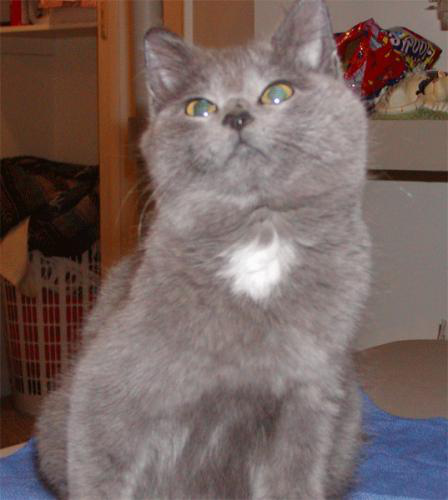

In [15]:
for im in img_names[:3]:
    display(Image.open(im))

In [16]:
img_sizes = []
rejected = []

for item in img_names:
    try :
        with Image.open(item) as img:
            img_sizes.append(img.size)
            
    except:
        rejected.append(item)
        


In [18]:
print(len(img_sizes))
len(rejected)

24994


0

In [21]:
img_sizes[:4]

[(365, 500), (484, 500), (448, 500), (500, 483)]

In [19]:
df = pd.DataFrame(img_sizes)

In [20]:
df.head()

,0,1
0,365,500
1,484,500
2,448,500
3,500,483
4,500,375


In [24]:
dog = Image.open(path + 'train/DOG/14.jpg')

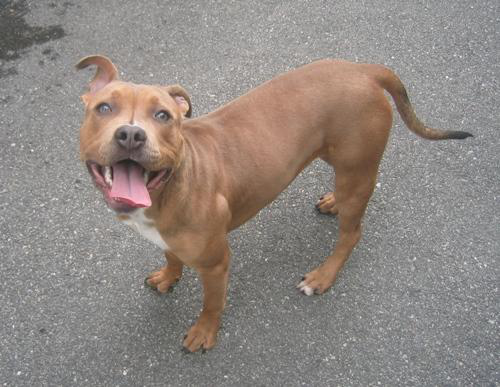

In [25]:
display(dog)

In [27]:
dog.size

(500, 387)

In [28]:
dog.getpixel((0,0))

(90, 95, 98)

In [29]:
transform = transforms.Compose([
    transforms.ToTensor()
])

im = transform(dog)
print(type(im))
print(im.shape)

<class 'torch.Tensor'>
torch.Size([3, 387, 500])


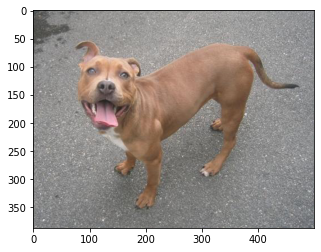

In [31]:
plt.imshow(np.transpose(im.numpy(), (1,2,0)))

In [33]:
train_transform = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(),
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([.485, .456, .406],
                        [.229, .224, .225])
    
])

In [34]:
test_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([.485, .456, .406],
                        [.229, .224, .225])

])

In [35]:
path

'/Users/asadmolayari/Desktop/my_courses/pytorch/Data/CATS_DOGS/'

In [36]:
root = path
train_data = datasets.ImageFolder(os.path.join(root, 'train'), transform=train_transform)
test_data = datasets.ImageFolder(os.path.join(root, 'test'), transform=test_transform)

torch.manual_seed(42)

train_loader = DataLoader(train_data, batch_size = 10, shuffle =True)
test_loader = DataLoader(test_data, batch_size= 10)

class_names= train_data.classes

In [38]:
train_data

Dataset ImageFolder
    Number of datapoints: 18743
    Root location: /Users/asadmolayari/Desktop/my_courses/pytorch/Data/CATS_DOGS/train
    StandardTransform
Transform: Compose(
               RandomRotation(degrees=(-10, 10), resample=False, expand=False)
               RandomHorizontalFlip(p=0.5)
               Resize(size=224, interpolation=PIL.Image.BILINEAR)
               CenterCrop(size=(224, 224))
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [39]:
for images, labels in train_loader:
    break

In [41]:
images.shape

torch.Size([10, 3, 224, 224])

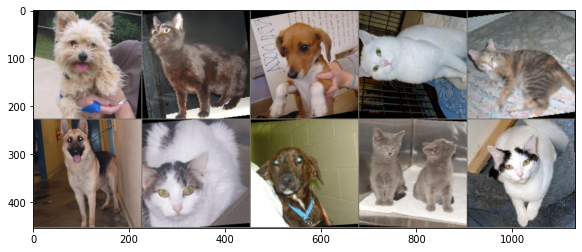

In [42]:
im = make_grid(images, nrow=5)

inv_normalize = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
    std=[1/0.229, 1/0.224, 1/0.225]
)
im_inv = inv_normalize(im)

# Print the images
plt.figure(figsize=(12,4))
plt.imshow(np.transpose(im_inv.numpy(), (1, 2, 0)));

In [60]:
class ConvolutionNet(nn.Module):
    
    def __init__(self):
        
        super().__init__()
        self.conv1 = nn.Conv2d(3,6,3,1)
        self.conv2 = nn.Conv2d(6,16,3,1)
        self.fc1 = nn.Linear(54*54*16, 120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,2)
        
    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 54*54*16)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        
        return F.log_softmax(X, dim = 1)

In [61]:
torch.manual_seed(101)
CNNmodel = ConvolutionNet()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(CNNmodel.parameters(), lr = .001)

In [62]:
CNNmodel

ConvolutionNet(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=46656, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=2, bias=True)
)

In [63]:
for p in CNNmodel.parameters():
    print(p.numel())

162
6
864
16
5598720
120
10080
84
168
2


In [64]:
import time
start_time = time.time()

epochs = 3

max_trn_batch = 800

max_tst_batch = 300

train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    for b, (X_train, y_train) in enumerate(train_loader):
        
        if b == max_trn_batch:
            break
            
        b +=1
        
        y_pred = CNNmodel(X_train)
        loss = criterion(y_pred, y_train)
        
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if b %200 ==0:
            print(f'Epoch {i} LOSS: {loss.item()}')
            
        
    train_losses.append(loss)
    train_correct.append(trn_corr)
    
    with torch.no_grad():
        for b,(X_test, y_test) in enumerate(test_loader):
            
            if b == max_tst_batch:
                break
                
            y_val = CNNmodel(X_test)
            
            predicted = torch.max(y_pred.data, 1)[1]
            barch_corr =(predicted==y_test).sum()
            tst_corr = tst_corr + barch_corr
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)            

total_time = time.time() - start_time

print(f'Total Time: {total_time/60}')


Epoch 0 LOSS: 0.7375394105911255
Epoch 0 LOSS: 0.7113019227981567
Epoch 0 LOSS: 0.7397984266281128
Epoch 0 LOSS: 0.4867902398109436
Epoch 1 LOSS: 0.352702260017395
Epoch 1 LOSS: 0.48692065477371216
Epoch 1 LOSS: 0.652255654335022
Epoch 1 LOSS: 0.3393157124519348
Epoch 2 LOSS: 0.4520796835422516
Epoch 2 LOSS: 0.3913445472717285
Epoch 2 LOSS: 0.3315354883670807
Epoch 2 LOSS: 0.3389483690261841
Total Time: 15.218158582846323


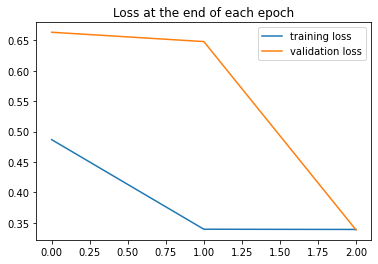

In [65]:
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

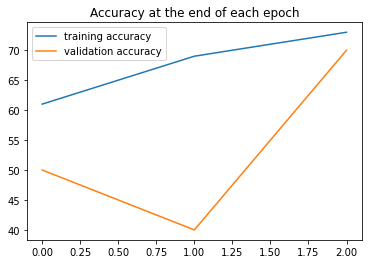

In [66]:
plt.plot([t/80 for t in train_correct], label='training accuracy')
plt.plot([t/30 for t in test_correct], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend();